# Importer les biliothèques Python

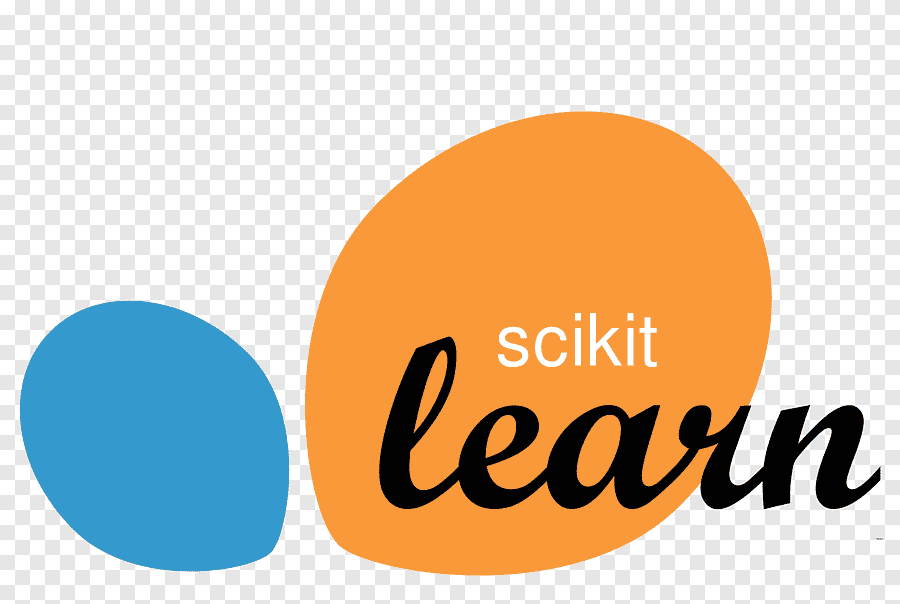

Scikit-learn est une bibliothèque libre Python destinée à l'apprentissage automatique. Elle est développée par de nombreux contributeurs notamment dans le monde académique par des instituts français d'enseignement supérieur et de recherche comme Inria. 

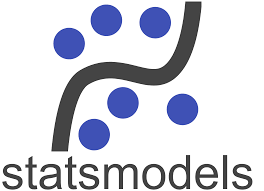
Statsmodels est un package Python qui permet aux utilisateurs d'explorer des données, d'estimer des modèles statistiques et d'effectuer des tests statistiques

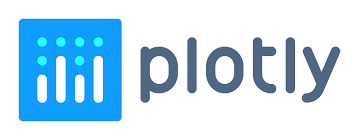
La bibliothèque graphique Python de Plotly crée des graphiques interactifs de qualité publication. Exemples de création de tracés linéaires, de nuages de points, de graphiques en aires, de graphiques à barres. 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import patsy
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly
from plotly.subplots import make_subplots
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.stats.stattools as smss
import statsmodels.stats.outliers_influence
np.set_printoptions(suppress=True)
np.seterr(divide='ignore', invalid='ignore')
plotly.offline.init_notebook_mode()
from IPython.display import Image

In [10]:
def VIF(dataframe, columns_list) : 
    
    data = dataframe[columns_list]
    
    cc = np.corrcoef(data, rowvar=False)
    VIF_m = np.linalg.inv(cc)
    VIF_d = VIF_m.diagonal() 
    
    #création du dataframe
    
    cols = {"Features": data[columns_list].columns.to_list(), 
           "VIF": VIF_d}
    
    return pd.DataFrame(cols)

def fig2img(fig):
    image_bytes = fig.to_image(format='png', scale=1) # you can use other formats as well (like 'svg','jpeg','pdf')

    #instead of using fig.show()
    return Image(image_bytes)

In [3]:
import os 
os.listdir()

['.ipynb_checkpoints',
 'dataset.csv',
 'Projet Statistiques pour Big Data.ipynb',
 'Untitled.ipynb']

In [4]:
dataframe = pd.read_csv("dataset.csv", sep = ",")
dataframe.head()

Y    X1    X2    X3   X4       X5       X6      X7       X8
0  7.38  38.5  38.0  55.0 -0.5  -1.2987  3025.00  -27.50   -71.43
1  8.51  37.5  40.0  67.5  2.5   6.6667  4556.25  168.75   450.00
2  9.52  37.0  43.0  72.5  6.0  16.2162  5256.25  435.00  1175.68
3  7.50  37.0  37.0  55.0  0.0   0.0000  3025.00    0.00     0.00
4  9.33  36.0  38.5  70.0  2.5   6.9444  4900.00  175.00   486.11

<h3> Variables de la dataset :</h3>
<ul>
    <li>$X_{1}$ : Le prix en (Francs) du flacon BIOBLANC sur la période des ventes</li>
    <li>$X_{2}$ : La moyenne des prix en (Francs) sur la période de ventes des produits liquides concurents</li>
    <li>$X_{3}$ : Le budget de la publicité (en $10^{4}$ francs) pour promouvoir BIOBLANC sur la période de ventes</li>
</ul>

<h3> Autres variables :</h3>

<ul>
    <li>$X_{4}$ : Différence de prix $X_{4}=X_{2}-X_{1}$</li>
    <li>$X_{5}$ : Différence relative de prix en $%$ $X_{5} = \frac{X_{4}}{X_{1}}.100$</li>
    <li>$X_{6}$ : Pub carré $X_{6} = X_{3}^{2}$</li>
    <li>$X_{7}$ : Variables croisées $X_{7} = X_{4}.X_{3}$</li>
    <li>$X_{6}$ : Pub carré $X_{8} = X_{5}.X_{3}$</li>
</ul>

In [5]:
dataframe.dtypes

Y     float64
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
dtype: object

In [6]:
dataframe.describe()

Y         X1         X2         X3         X4         X5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    8.372667  37.350000  39.483333  64.516667   2.133333   5.760310   
std     0.676176   0.901627   2.159515   5.740785   2.274041   6.141379   
min     7.100000  35.500000  36.500000  52.500000  -1.500000  -3.947400   
25%     7.900000  37.000000  37.500000  60.625000   0.125000   0.328950   
50%     8.390000  37.500000  39.500000  66.250000   2.000000   5.266800   
75%     8.892500  38.000000  41.000000  68.000000   4.000000  10.810800   
max     9.520000  39.000000  43.000000  72.500000   6.000000  16.438400   

                X6          X7           X8  
count    30.000000   30.000000    30.000000  
mean   4194.258333  147.225000   397.538000  
std     715.788435  156.318038   422.270026  
min    2756.250000  -78.750000  -207.240000  
25%    3676.562500    6.562500    17.270000  
50%    4390.625000  130.000000   342.340000  
75%    4624.000000  278.000000   751.355000  
max    5256.250000  435.000000  1175.680000

Une des fonctions importantes dans la bibliothèque « Pandas » est la méthode
.describe() qui donne la statistique récapitulative des variables numériques qu'on dispose dans notre dataset. La sortie ci-
dessus montre les statistiques récapitulatives importantes de toutes les variables
numériques telles que la moyenne, la médiane (50%), les valeurs minimales et maximales,
ainsi que l'écart type.<br />
Le tableau montre le nombre d'observations valides pour chaque variable choisie. En
tout, il y a 30 valeurs valides pour toutes les variables de la Dataset. La moyenne
affichée indique les bornes inférieur et supérieur des valeurs des variables de la Dataset
considérons par exemple : le prix minimum et 7.100  et le prix maximum est 9.52 pour la variable des ventes $Y$
. Le maximum et minimum de chaque variable semble naturel alors la majorité des
données de la Dataset sont juste et bien récupérée.<br/>
Après avoir utilisé la description statique descriptive afin de décrire les données.
Maintenant, nous allons représenter chaque variable dans le graphique approprié afin que
nous ayons une compréhension de la distribution de chaque variable dans l'ensemble de
données.

# Exploration de la Dataset :

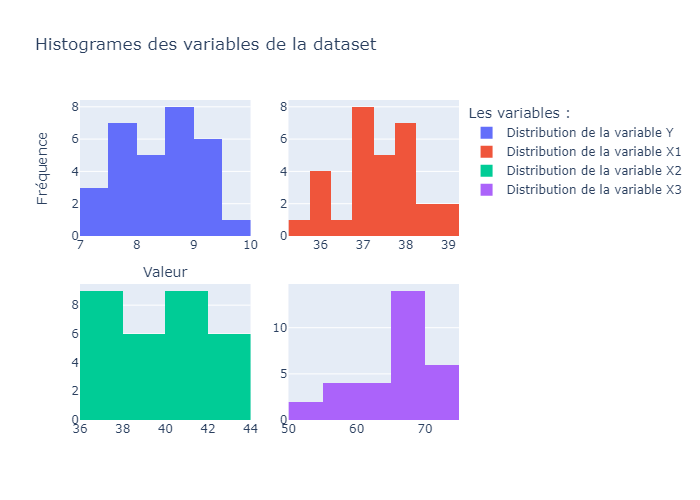

In [11]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Histogram(x=dataframe["Y"], name="Distribution de la variable Y"), row=1, col=1)

fig.add_trace(go.Histogram(x=dataframe["X1"], name="Distribution de la variable X1"), row=1, col=2)

fig.add_trace(go.Histogram(x=dataframe["X2"], name="Distribution de la variable X2"), row=2, col=1)

fig.add_trace(go.Histogram(x=dataframe["X3"], name="Distribution de la variable X3"), row=2, col=2)

fig.update_layout(
    title="Histogrames des variables de la dataset",
    xaxis_title="Valeur",
    yaxis_title="Fréquence",
    legend_title="Les variables :"
)
fig2img(fig)

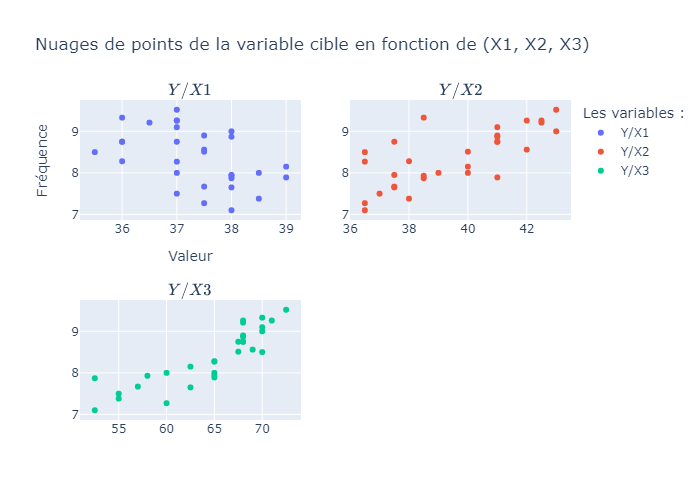

In [12]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Nuage de points $Y/X1$", "Nuage de points $Y/X2$", "Nuage de points $Y/X3$"))

fig.add_trace(go.Scatter(x=dataframe["X1"], y=dataframe["Y"], mode = "markers", name="Y/X1"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=dataframe["X2"], y=dataframe["Y"], mode = "markers", name="Y/X2"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=dataframe["X3"], y=dataframe["Y"], mode = "markers", name="Y/X3"),
              row=2, col=1)

fig.update_layout(
    title="Nuages de points de la variable cible en fonction de (X1, X2, X3)",
    xaxis_title="Valeur",
    yaxis_title="Fréquence",
    legend_title="Les variables :"
)

fig2img(fig)

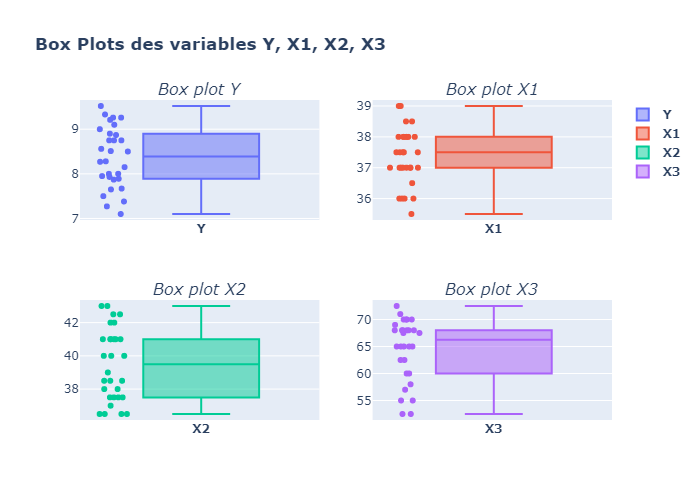

In [13]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("<i>Box plot Y</i>", "<i>Box plot X1</i>", "<i>Box plot X2</i>", "<i>Box plot X3</i>"))

fig.add_trace(go.Box(y=dataframe["Y"], boxpoints='all', name="<b>Y</b>"),
              row=1, col=1)

fig.add_trace(go.Box(y=dataframe["X1"], boxpoints='all', name="<b>X1</b>"),
              row=1, col=2)

fig.add_trace(go.Box(y=dataframe["X2"], boxpoints='all', name="<b>X2</b>"),
              row=2, col=1)

fig.add_trace(go.Box(y=dataframe["X3"], boxpoints='all', name="<b>X3</b>"),
              row=2, col=2)

fig.update_layout(
    title="<b>Box Plots des variables Y, X1, X2, X3</b>"
)

fig2img(fig)

Dans le graphe des nuages de points en haut nous avons placé la variable "$X_{1}, X_{2}, X_{3}$" sur l'axe des x et les ventes sur l'axe des y. Ce nuage de points montre la relation entre 
ces variables et la variation de ventes. Dans le nuage de points de $X_{1}$ on remarque qu'il y a une faible infuance sur les ventes. Cependant lorsque $X_{2}$ et $X_{3}$ augmentent les ventes augmentent. En conclusion, nous avons transmis la relation entre ces variables dans l'ensemble de données: à mesure que les variables $X_{2}, X_{3}$ ont une influance sur la variable $Y$.

# Regressions linéaires simples de Y par rapport à chacune des huit variables $X1, X2, X3, X4, X5, X6, X7, X8$

In [14]:
dataframe.columns.to_list()[1:]

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

In [15]:
for regressor in dataframe.columns.to_list()[1:] : 
    equation = "Y ~ {reg}".format(reg = regressor)
    print("==============================Equation {}=================================".format(equation))
    model = smf.ols(equation, data=dataframe)
    result = model.fit()
    print(result.summary())
    print()

==============================Equation Y ~ X1=================================
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     8.171
Date:                Sat, 01 Jan 2022   Prob (F-statistic):            0.00795
Time:                        00:16:10   Log-Likelihood:                -26.480
No. Observations:                  30   AIC:                             56.96
Df Residuals:                      28   BIC:                             59.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

D'après les résultats des régressions simple ci-dessus : 
<ul>
    <li>Le pourcentage de la variation $R^{2}$ pour le premier modèle $Y ~ X_{1}$ et $Y ~ X_{2}$ est faible.</li>
    <li>Pour les autres regressions la valeur $R^{2}$ est presque la meme et aussi en valeur de Intercept.</li>
</ul>

# Regression linéaire multiple

## Matrice des nuages de points et des corrélations

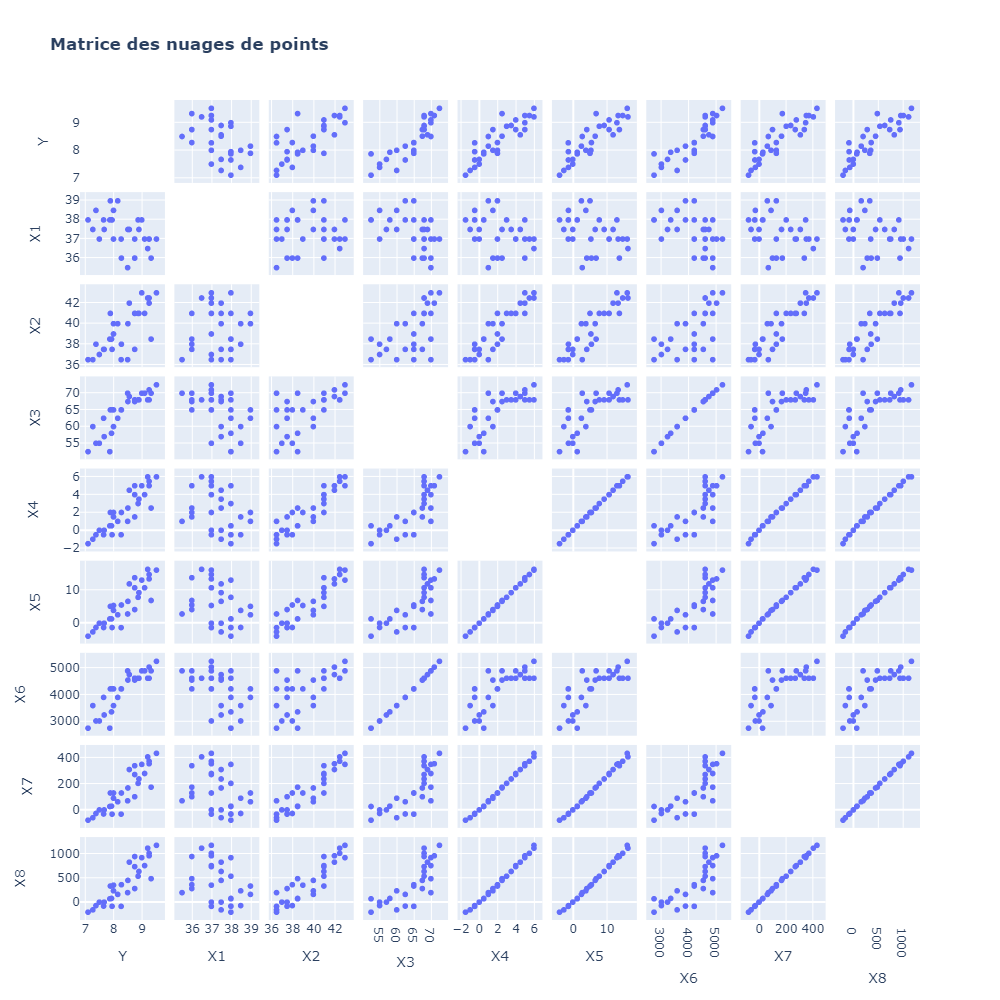

<Figure size 1152x1296 with 0 Axes>

In [17]:
plt.figure(figsize=(16, 18))
fig = px.scatter_matrix(
    dataframe,
    dimensions=dataframe.columns.to_list(), 
    title = "<b>Matrice des nuages de points</b>", 
    width = 1000, 
    height = 1000
)
fig.update_traces(diagonal_visible=False)
fig2img(fig)

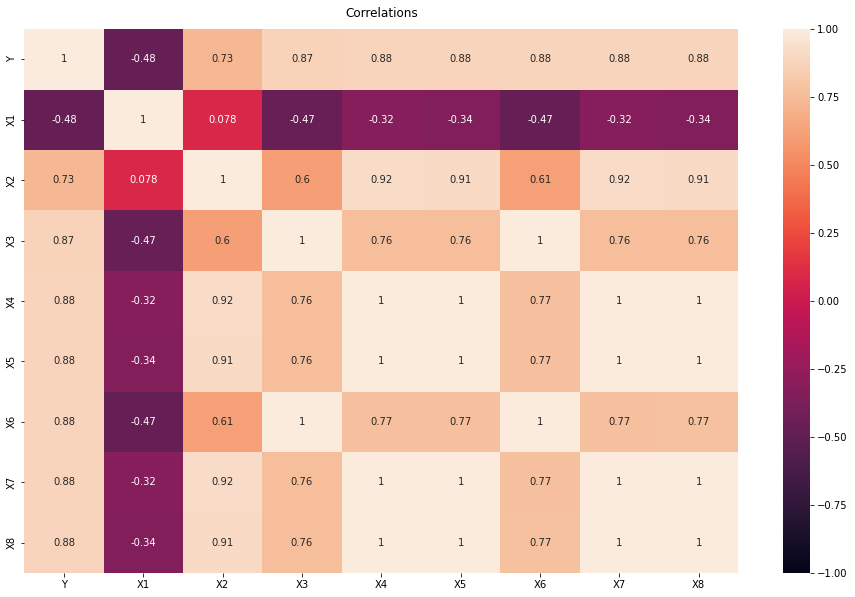

In [19]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlations', fontdict={'fontsize':12}, pad=12);

<h6> <b>Le modèle proposé est : </b></h6><br /> $ Y = \beta_{0} + \beta_{1}*X_{2} + \beta_{2}*X_{3} + \beta_{3}*X_{4} + \beta_{4}*X_{5} + \beta_{5}*X_{6} + \beta_{6}*X_{7} + \beta_{7}*X_{8} $


In [20]:
model = smf.ols(("Y ~ X2 + X3 + X5 +X4 + X6 + X7 + X8"), data=dataframe)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     33.51
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           2.62e-10
Time:                        00:16:50   Log-Likelihood:                 6.5228
No. Observations:                  30   AIC:                             2.954
Df Residuals:                      22   BIC:                             14.16
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.2062      8.532      3.189      0.0

D'après les résultats de la regression lineaire multiple suivante : 
<ul>
    <li>$F-statistic=33.51$ et $Prob=2.62*10^{-10}$ donc rejette l'hypoyhese nulle que les parametres du modèle ne sont pas tous nuls.</li>
    <li>Les $P>|t|$ associées aux variables $X_{2}$, $X_{3}$, $X_{4}$, $X_{7}$ et $X_{8}$ sont $>5\%$ donc ne sont pas significatif.</li>
    <li>$R^{2}=91,4\%$ donc ce modèle explique presque $91 \%$ de la variablilité des ventes.</li>
</ul>

## Validation du modèle :

### Indépendance: le test de Durbin-Watson : 

<p>D'après les résultats de la regression multiple on a : </p><br />
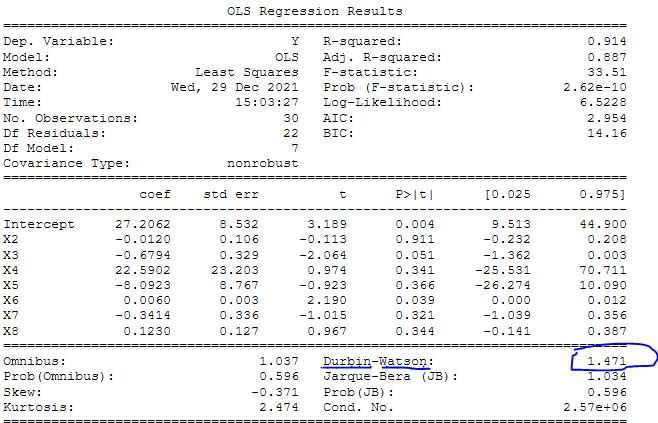

<br />

<table>
    <tr>
        <th>Durbin-Watson Statistic</th>
        <th>d1</th>
        <th>d2</th>
    </tr>
    <tr>
        <td>1.471</td>
        <td>0.998</td>
        <td>1.931</td>
    </tr>
</table>

Étant donné que la valeur de la statistique de Durbin-Watson tombe entre les valeurs de $d_{1}$ et $d_{2}$ (obtenu à partir du tableau des limites du test de Durbin-Watson), il existe une doute que les termes d'erreur sont positivement corrélées. 

### Egalité de variance : Dessin des résidus contre les régresseurs.

In [21]:
#dans cette partie on va créer une colonne pour les résidus (diff) issue de la différence de 'predictions' et Y
dataframe["predictions"] = result.predict()
dataframe["diff"] = dataframe["Y"] - dataframe["predictions"]

In [22]:
dataframe.head()

Y    X1    X2    X3   X4       X5       X6      X7       X8  \
0  7.38  38.5  38.0  55.0 -0.5  -1.2987  3025.00  -27.50   -71.43   
1  8.51  37.5  40.0  67.5  2.5   6.6667  4556.25  168.75   450.00   
2  9.52  37.0  43.0  72.5  6.0  16.2162  5256.25  435.00  1175.68   
3  7.50  37.0  37.0  55.0  0.0   0.0000  3025.00    0.00     0.00   
4  9.33  36.0  38.5  70.0  2.5   6.9444  4900.00  175.00   486.11   

   predictions      diff  
0     7.396327 -0.016327  
1     8.573425 -0.063425  
2     9.545352 -0.025352  
3     7.595776 -0.095776  
4     9.023797  0.306203

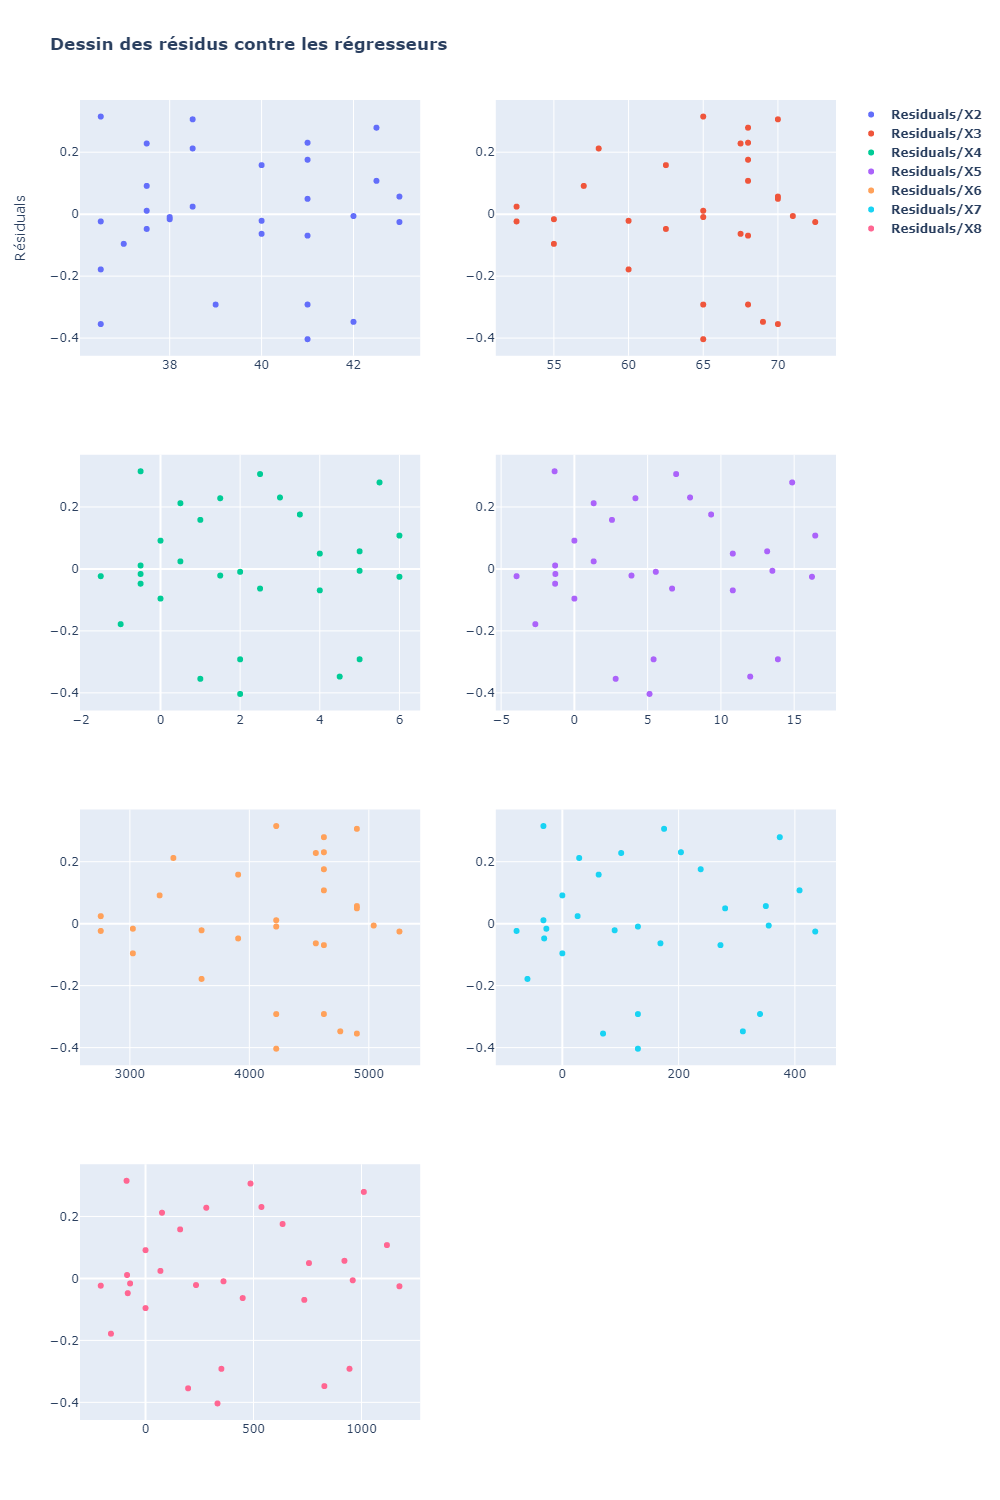

<Figure size 1152x1800 with 0 Axes>

In [24]:
plt.figure(figsize=(16, 25))

fig = make_subplots(rows=4, cols=2)

fig.add_trace(go.Scatter(x=dataframe["X2"], y=dataframe["diff"], mode = "markers", name="<b>Residuals/X2</b>"),
              row=1, col=1)

fig.add_trace(go.Scatter(x=dataframe["X3"], y=dataframe["diff"], mode = "markers", name="<b>Residuals/X3</b>"),
              row=1, col=2)

fig.add_trace(go.Scatter(x=dataframe["X4"], y=dataframe["diff"], mode = "markers", name="<b>Residuals/X4</b>"),
              row=2, col=1)

fig.add_trace(go.Scatter(x=dataframe["X5"], y=dataframe["diff"], mode = "markers", name="<b>Residuals/X5</b>"),
              row=2, col=2)

fig.add_trace(go.Scatter(x=dataframe["X6"], y=dataframe["diff"], mode = "markers", name="<b>Residuals/X6</b>"),
              row=3, col=1)

fig.add_trace(go.Scatter(x=dataframe["X7"], y=dataframe["diff"], mode = "markers", name="<b>Residuals/X7</b>"),
              row=3, col=2)

fig.add_trace(go.Scatter(x=dataframe["X8"], y=dataframe["diff"], mode = "markers", name="<b>Residuals/X8</b>"),
              row=4, col=1)

fig.update_layout(
    title="<b>Dessin des résidus contre les régresseurs</b>",
    yaxis_title="Résiduals",
    width = 1000, 
    height = 1500
)

fig2img(fig)

### Egalité de variance (Test global):

In [25]:
GQ_test = sms.diagnostic.het_goldfeldquandt(dataframe["Y"],dataframe[['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']])
GQ_test_results = pd.Series({'F-statistic':GQ_test[0], 'P-value':GQ_test[1]})
GQ_test_results

F-statistic    0.777441
P-value        0.634825
dtype: float64

Le test de Goldfeld-Quandt

<ul>
    <li>$H_{0}$: L'hétéroscédasticité n'est pas présente. </li>
    <li>$H_{1}$: présence de l'hétéroscédasticité. .</li>
</ul>

La P value=0.63>0.05 donc on accepte l'hypo nulle et on déduit que les résidus sont homoscidastiques.

### Normalité des résidus:

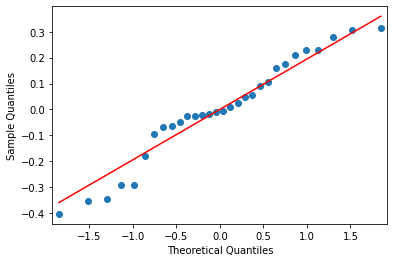

In [27]:
residuals = result.resid # residuals
fig = sm.qqplot(residuals, line = "s")
plt.show()

Tous les points sont alignés autour de la droite, donc la normalité semble bien respectée, 

### Test de Jarque-Bera 

D'après les résultats de la regression multiple on la F-stat de Jarque-Bera est $1.034$ et P-value $ 0.596 $ alors on accepte $H_{0}$ et on déduit la normalité des résidus.

In [28]:
jarque_bera_results = smss.jarque_bera(residuals)
jarque_bera = pd.Series({'F-statistic':jarque_bera_results[0], 'P-value':jarque_bera_results[1]})
jarque_bera

F-statistic    1.033664
P-value        0.596407
dtype: float64

## Vérification de la robustesse de régression:

In [29]:
influence = result.get_influence()
influence_frame = influence.summary_frame()
influence_frame

dfb_Intercept    dfb_X2    dfb_X3    dfb_X5    dfb_X4    dfb_X6    dfb_X7  \
0       -0.006648 -0.033323  0.019164 -0.026435  0.026567 -0.019089 -0.025057   
1       -0.021151 -0.027931  0.031422 -0.041490  0.040869 -0.033160 -0.041146   
2        0.016759  0.024112 -0.025349  0.104829 -0.103172  0.026379  0.103688   
3       -0.037902  0.288472 -0.098577  0.138281 -0.138005  0.111070  0.124219   
4        0.402376  0.069032 -0.386367 -0.281426  0.289176  0.395053 -0.314956   
5        0.001778  0.010220 -0.005750 -0.014185  0.014165  0.005734 -0.014664   
6        0.097934 -0.205439 -0.004003  0.037485 -0.035551  0.007637  0.042001   
7        0.181746  0.044792 -0.170273  0.004628 -0.001029  0.164524 -0.001174   
8       -0.024772 -0.030850  0.032041 -0.067677  0.069538 -0.030359 -0.068796   
9        0.017912  0.009705 -0.020640  0.051750 -0.052273  0.021526  0.052172   
10       0.226609 -0.395534 -0.024597  0.325685 -0.331743  0.011320  0.334888   
11      -0.161892  0.246734  0.034575 -0.127310  0.128618 -0.027879 -0.141388   
12       0.022847  0.017239 -0.027623 -0.000317  0.000443  0.028314 -0.001428   
13      -0.025596  0.086526 -0.013838 -0.179955  0.181718  0.014720 -0.203244   
14       0.031912  0.013062 -0.034797  0.094923 -0.094065  0.036672  0.099519   
15       0.110494  0.134947 -0.157447  0.212349 -0.210268  0.163915  0.217639   
16      -0.000644 -0.000087  0.000594  0.004975 -0.004901 -0.000584  0.004997   
17       0.035285 -0.036575 -0.015556  0.132151 -0.133643  0.015168  0.145861   
18       0.003649  0.002255 -0.003974 -0.023954  0.023737  0.003798 -0.024191   
19      -0.002793  0.026753 -0.009663  0.012625 -0.012610  0.010911  0.011210   
20       0.058525 -0.044390 -0.030239 -0.014468  0.015399  0.027292 -0.012711   
21       0.478137  0.328506 -0.551928  0.279997 -0.269316  0.551119  0.257696   
22       0.081211  0.132134 -0.123655 -0.158574  0.157150  0.121429 -0.166871   
23      -1.218964  0.449084  0.888534  0.166022 -0.185031 -0.901631  0.177713   
24       0.220061 -0.408715 -0.020550 -0.165932  0.163364  0.016635 -0.104427   
25      -0.108089  0.052697  0.074170  0.036626 -0.036849 -0.075951  0.027338   
26      -0.194404 -0.298274  0.281380 -0.160081  0.156341 -0.269107 -0.142806   
27      -0.056777 -0.125841  0.106485 -0.078449  0.077319 -0.111274 -0.071799   
28      -0.100636 -0.066324  0.122728 -0.141168  0.141811 -0.129044 -0.140294   
29      -0.176376 -0.120699  0.209295  0.058551 -0.059869 -0.215941  0.066972   

      dfb_X8   cooks_d  standard_resid  hat_diag  dffits_internal  \
0   0.025079  0.000370       -0.085196  0.289415        -0.054371   
1   0.041881  0.001038       -0.292228  0.088588        -0.091107   
2  -0.105363  0.004684       -0.169359  0.566439        -0.193579   
3  -0.126071  0.018509       -0.523015  0.351198        -0.384800   
4   0.305024  0.108057        1.566287  0.260557         0.929759   
5   0.014598  0.000115       -0.048341  0.283249        -0.030389   
6  -0.043083  0.028183        1.093853  0.158555         0.474829   
7  -0.002777  0.007416        0.179828  0.647206         0.243567   
8   0.066986  0.004159       -0.157919  0.571595        -0.182411   
9  -0.051637  0.000790       -0.114508  0.325317        -0.079513   
10 -0.326184  0.163868       -2.036508  0.240174        -1.144963   
11  0.138375  0.027698        0.806223  0.254230         0.470723   
12  0.001179  0.000667        0.228568  0.092711         0.073065   
13  0.199992  0.049589       -1.637860  0.128832        -0.629851   
14 -0.100162  0.007852        0.808959  0.087583         0.250633   
15 -0.220037  0.027702        1.102646  0.154175         0.470763   
16 -0.005064  0.000024       -0.029257  0.183529        -0.013871   
17 -0.143626  0.012054        0.338974  0.456301         0.310536   
18  0.024305  0.000951       -0.316010  0.070790        -0.087223   
19 -0.011397  0.000195        0.058491  0.312913         0.039472   
20  0.012062  0.001651       -0.233724  0.1

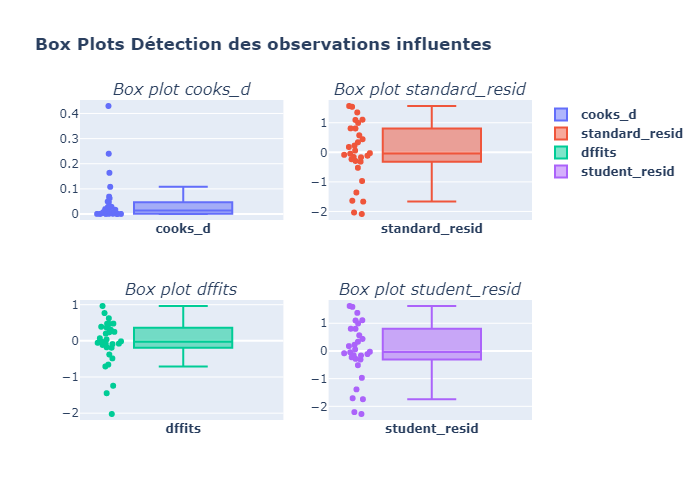

In [31]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("<i>Box plot cooks_d</i>", "<i>Box plot standard_resid</i>", "<i>Box plot dffits</i>", "<i>Box plot student_resid</i>"))

fig.add_trace(go.Box(y=influence_frame["cooks_d"], boxpoints='all', name="<b>cooks_d</b>"),
              row=1, col=1)

fig.add_trace(go.Box(y=influence_frame["standard_resid"], boxpoints='all', name="<b>standard_resid</b>"),
              row=1, col=2)

fig.add_trace(go.Box(y=influence_frame["dffits"], boxpoints='all', name="<b>dffits</b>"),
              row=2, col=1)

fig.add_trace(go.Box(y=influence_frame["student_resid"], boxpoints='all', name="<b>student_resid</b>"),
              row=2, col=2)

fig.update_layout(
    title="<b>Box Plots Détection des observations influentes</b>"
)

fig2img(fig)

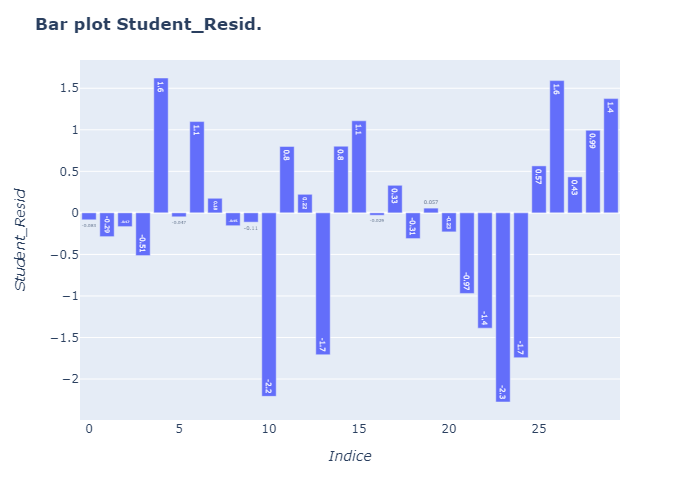

In [33]:
fig = px.bar(
    influence_frame, 
    x=influence_frame.index, 
    y='student_resid', 
    text_auto='.2',
    labels = {"index": "<i>Indice</i>", "student_resid": "<i>Student_Resid</i>"}
)
fig.update_layout(
    title = "<b>Bar plot Student_Resid.</b>"
)
fig2img(fig)

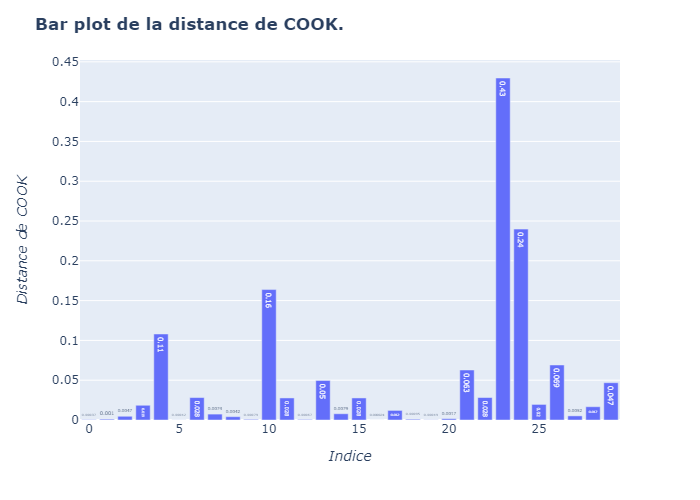

In [34]:
fig = px.bar(
    influence_frame, 
    x=influence_frame.index, 
    y='cooks_d', 
    text_auto='.2',
    labels = {"index": "<i>Indice</i>", "cooks_d": "<i>Distance de COOK</i>"}
)
fig.update_layout(
    title = "<b>Bar plot de la distance de COOK.</b>"
)
fig2img(fig)

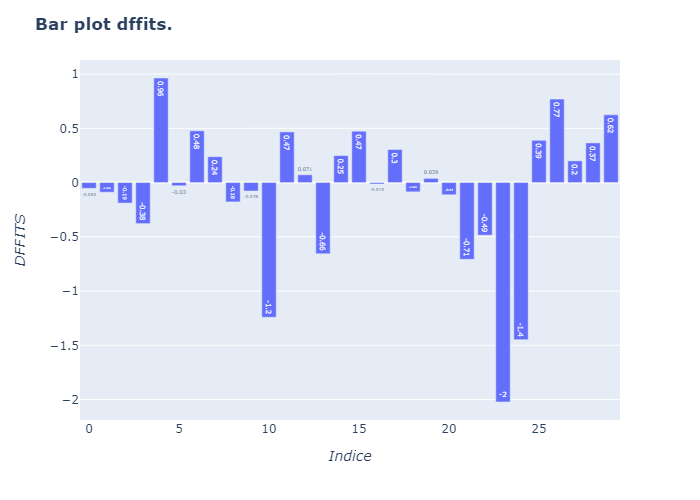

In [35]:
fig = px.bar(
    influence_frame, 
    x=influence_frame.index, 
    y='dffits', 
    text_auto='.2',
    labels = {"index": "<i>Indice</i>", "dffits": "<i>DFFITS</i>"}
)
fig.update_layout(
    title = "<b>Bar plot dffits.</b>"
)
fig2img(fig)

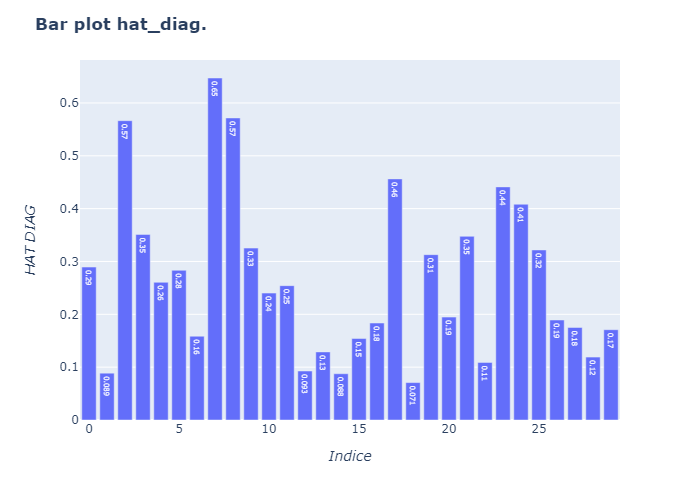

In [36]:
fig = px.bar(
    influence_frame, 
    x=influence_frame.index, 
    y='hat_diag', 
    text_auto='.2',
    labels = {"index": "<i>Indice</i>", "hat_diag": "<i>HAT DIAG</i>"}
)
fig.update_layout(
    title = "<b>Bar plot hat_diag.</b>"
)
fig2img(fig)

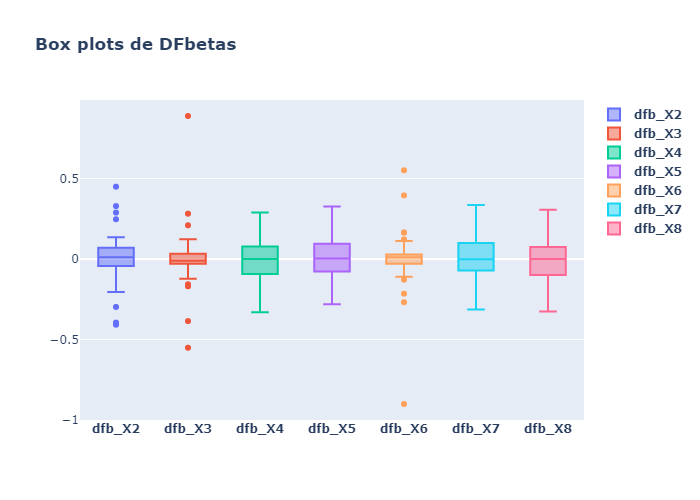

In [37]:
fig = go.Figure()
fig.add_trace(go.Box(y=influence_frame["dfb_X2"], name="<b>dfb_X2</b>"))
fig.add_trace(go.Box(y=influence_frame["dfb_X3"], name="<b>dfb_X3</b>"))
fig.add_trace(go.Box(y=influence_frame["dfb_X4"], name="<b>dfb_X4</b>"))
fig.add_trace(go.Box(y=influence_frame["dfb_X5"], name="<b>dfb_X5</b>"))
fig.add_trace(go.Box(y=influence_frame["dfb_X6"], name="<b>dfb_X6</b>"))
fig.add_trace(go.Box(y=influence_frame["dfb_X7"], name="<b>dfb_X7</b>"))
fig.add_trace(go.Box(y=influence_frame["dfb_X8"], name="<b>dfb_X8</b>"))
fig.update_layout(
    title = "<b>Box plots de DFbetas</b>"
)
fig2img(fig)

D'après les box plots et les bars plots ci-dessus on déduit que : 
<ul>
    <li>Les observations 25 et 24 ont des résidus "grand" ($|STUDENT| et |RDSTUDENT|)>2$ un grand effet sur la précision </li>
    <li>Les observations 20 et 33 influentégalement sur $|DFFITS| >> 0.67$</li>
 
Les observations 23 et 24 seraient atypiques, en supprimant ces deux dernières de l'ensemble de données. La regréssion linéaire multiple sur la nouvelle dataset montre une augementation de la valeur de $R^{2}$ de $2.76 %$ par rapport à la régression précédante.

In [38]:
copy_dataframe = dataframe.copy()
copy_dataframe = copy_dataframe.drop([23,24])

In [39]:
copy_dataframe.index = pd.RangeIndex(start=0, stop=28, step=1)

In [40]:
model2 = smf.ols(("Y ~ X2 + X3 + X5 +X4 + X6 + X7 + X8"), data=copy_dataframe)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     44.48
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           7.90e-11
Time:                        00:19:05   Log-Likelihood:                 10.218
No. Observations:                  28   AIC:                            -4.436
Df Residuals:                      20   BIC:                             6.221
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6262      8.546      4.052      0.0

### Multi colinéarité :

#### Indice VIF (Variance Inflation Factor) - Détection 

In [41]:
VIF_df = VIF(copy_dataframe, ["X2", "X3", "X5", "X6", "X7", "X8"])
VIF_df

Features          VIF
0       X2    24.484751
1       X3  1990.489964
2       X5   815.687272
3       X6  2145.816191
4       X7  7465.692087
5       X8  6755.257072

VIF est plus grande pour toutes les variables alors il exite une multicolinarité 

### Remèdes en cas de multi-colinéarité

#### Regression Ridge 

In [42]:
xs = copy_dataframe.iloc[:,2:9]
ys = copy_dataframe.iloc[:,9]

In [43]:
###liste des alphas
coef=[]
alphas = np.linspace(0.01, 1, num=100)

for a in alphas:
  ridgereg=Ridge(alpha=a)
  ridgereg.fit(xs,ys)
  coef.append(ridgereg.coef_)

betas_dataframe = pd.DataFrame(coef, columns=["X2", "X3", "X4", "X5", "X6", "X7", "X8"])
betas_dataframe["alphas"] = alphas
betas_dataframe

X2        X3        X4        X5        X6        X7        X8  \
0   0.030991 -0.764217  0.327808  0.302485  0.006753 -0.020272  0.001683   
1   0.029488 -0.745234  0.232818  0.328328  0.006595 -0.018567  0.001205   
2   0.027949 -0.726915  0.198892  0.331602  0.006442 -0.017759  0.001058   
3   0.026459 -0.709408  0.180437  0.329486  0.006297 -0.017189  0.000994   
4   0.025030 -0.692693  0.168267  0.325418  0.006157 -0.016724  0.000963   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.012342 -0.217378  0.048485  0.120218  0.002200 -0.007424  0.001594   
96 -0.012439 -0.215730  0.048158  0.119433  0.002186 -0.007399  0.001599   
97 -0.012534 -0.214106  0.047836  0.118660  0.002172 -0.007374  0.001605   
98 -0.012627 -0.212505  0.047519  0.117897  0.002159 -0.007350  0.001610   
99 -0.012718 -0.210929  0.047206  0.117144  0.002146 -0.007326  0.001615   

    alphas  
0     0.01  
1     0.02  
2     0.03  
3     0.04  
4     0.05  
..     ...  
95    0.96  
96    0.97  
97    0.98  
98    0.99  
99    1.00  

[100 rows x 8 columns]

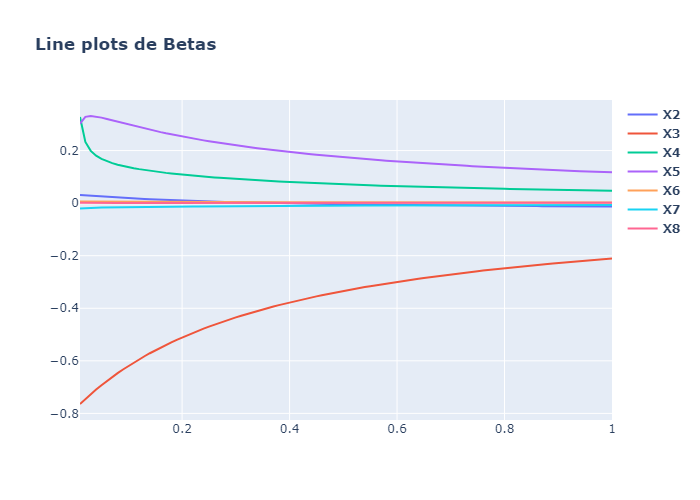

In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=betas_dataframe["alphas"], y=betas_dataframe["X2"], name="<b>X2</b>"))
fig.add_trace(go.Scatter(x=betas_dataframe["alphas"], y=betas_dataframe["X3"], name="<b>X3</b>"))
fig.add_trace(go.Scatter(x=betas_dataframe["alphas"], y=betas_dataframe["X4"], name="<b>X4</b>"))
fig.add_trace(go.Scatter(x=betas_dataframe["alphas"], y=betas_dataframe["X5"], name="<b>X5</b>"))
fig.add_trace(go.Scatter(x=betas_dataframe["alphas"], y=betas_dataframe["X6"], name="<b>X6</b>"))
fig.add_trace(go.Scatter(x=betas_dataframe["alphas"], y=betas_dataframe["X7"], name="<b>X7</b>"))
fig.add_trace(go.Scatter(x=betas_dataframe["alphas"], y=betas_dataframe["X8"], name="<b>X8</b>"))
fig.update_layout(
    title = "<b>Line plots de Betas</b>"
)
fig2img(fig)

In [46]:
#define prédicteur et variables de réponse
X_reg = copy_dataframe[["X2", "X3", "X5", "X6", "X7", "X8"]]
y_reg = copy_dataframe["Y"]

#define méthode de validation croisée pour évaluer le modèle 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#definir le model
model_ridge = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

model_ridge.fit(X_reg, y_reg)

#afficher le lambda qui a produit le test MSE le plus bas 
print("Meilleur Alpha", model_ridge.alpha_)
print("R-squared ", model_ridge.score(X_reg, y_reg))

Meilleur Alpha 0.05
R-squared  0.9352557545043535


#### Regression PLS (Partial Least Squares) 

Text(0, 0.5, 'MSE')

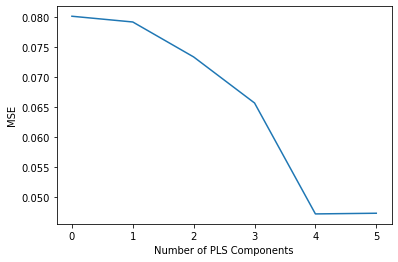

In [47]:
#define méthode de validation croisée

mse = []
n = len(X_reg)

# CV 10 fois, avec lecture aléatoire
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 7):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, X_reg, y_reg, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

#plot test MSE vs nombre de composants
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')

D'après le graphique ci-dessus on déduit que le nombre des composantes à retenir est $4$

In [48]:
#calculate RMSE
pls = PLSRegression(n_components=4)
pls.fit(X_reg, y_reg)

print("R-squared ", pls.score(X_reg, y_reg))

R-squared  0.9180086768885001
